## KNN
## Notes
* Classifies data points based on the points that are most similar to it
* "Lazy": makes no generalizations
* Non-parametric: makes no assumptions (e.g. doesn't assume anything of underlying population distribution)
* "The entire training dataset is stored. When a prediction is required, the k-most similar records to a new record from the training dataset are then located. From these neighbors, a summarized prediction is made."
* Calculate euclidean (pythagorean) distance
* “In the context of machine learning, hyperparameters are parameters whose values are set prior to the commencement of the learning process. By contrast, the value of other parameters is derived via training.” Thus, in KNN there seems to be only one hyperparameter: K. 
## Questions
* I assume K is user defined and the weights are learned? 
* Can KNN inputs be 3D? Answer: Yes. Mathematically it makes sense, but it's hard (i.e. impossible) to visualize KNN in > 3D in my opinion. 

## KNN_dataset

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import minmax_scale as normalize
from sklearn.metrics import confusion_matrix, accuracy_score

In [83]:
df = pd.read_csv('https://github.com/HarritonResearchLab/genomics/raw/main/src/exploring/e1/KNN_dataset.csv')

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221

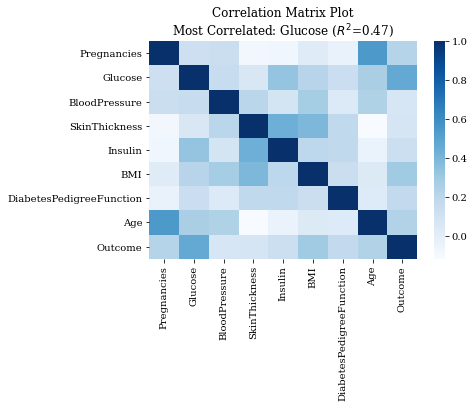

In [86]:
# Correlation matrix plot
sns.heatmap(df.corr(), cmap='Blues')

plt.title('Correlation Matrix Plot\nMost Correlated: Glucose ('+r'$R^2$'+'=0.47)')
print(df.corr())

In [76]:
# make 3D visualization of 3D knn neighbor selection?

# Compile into X

x_cols = list(df)[:-1]

X = np.array([normalize(np.array(df[i]), feature_range=(0,1)) for i in x_cols])
X = X.reshape(768, 8)

y = np.array(df['Outcome'])

y = y.reshape(768,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

knn = KNeighborsClassifier(5)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)


acc = accuracy_score(predictions, y_test.flatten())

C:\Users\Research\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


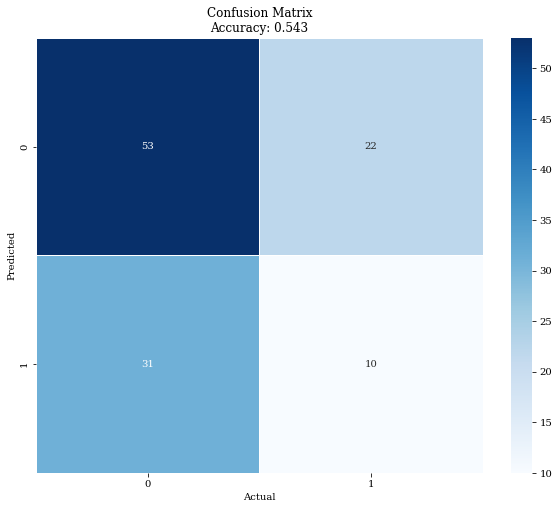

In [87]:
fig, ax = plt.subplots(figsize=(10, 8))
plt.rcParams['font.family']='serif'

cm = confusion_matrix(y_test.flatten(), predictions)

sns.heatmap(cm, annot=True, cmap='Blues', linewidths=.5)
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.title('Confusion Matrix\nAccuracy: '+str(round(acc, 3)))
plt.show()

C:\Users\Research\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Research\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Research\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Research\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neighbors\_classification.

Text(0, 0.5, 'Accuracy')

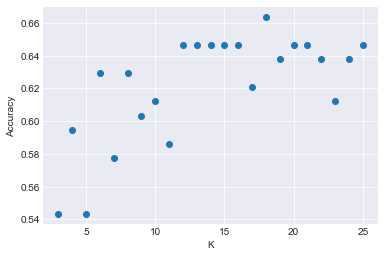

In [92]:
# test k vs acc

ks = np.arange(3, 26, 1)
accs = np.array([])

y_test = y_test.flatten()
for k in ks: 
    knn = KNeighborsClassifier(k)
    knn.fit(X_train, y_train)
    predictions = knn.predict(X_test)

    acc = accuracy_score(predictions, y_test)

    accs = np.append(accs, acc)

# Plot
plt.style.use('seaborn-darkgrid')
plt.scatter(ks, accs)
plt.xlabel('K')
plt.ylabel('Accuracy')